In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_s_curve

In [2]:
s_curve, _ = make_s_curve(10**4, noise=0.1)
s_curve = s_curve[:, [0, 2]]/10.0

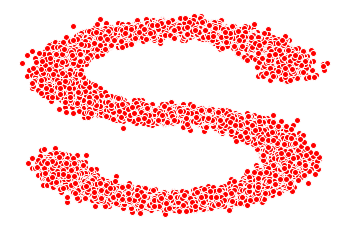

In [8]:
data = s_curve.T
fig, ax = plt.subplots()
ax.scatter(*data, color="red", edgecolor="white")
ax.axis("off")
dataset = torch.Tensor(s_curve).float()

$\Large\beta_t$

In [5]:
num_steps = 100
betas = torch.linspace(-6, 6, num_steps)
betas = torch.sigmoid(betas) * (0.5e-2 - 1e-5) + 1e-5

$\Large \alpha_t = 1 - \beta_t$

In [7]:
alphas = 1 - betas

$\Large \bar{\alpha}_t = \prod\limits_{i=1}^{T}\alpha_i$

In [10]:
alphas_prod = torch.cumprod(alphas, 0)
# p: previous
alphas_prod_p = torch.cat([torch.tensor([1]).float(), alphas_prod[:-1]], 0)

$\Large \sqrt{\bar{\alpha_t}}$

In [11]:
alphas_bar_sqrt = torch.sqrt(alphas_prod)

$\Large \log(1-\bar{a}_t)$

In [12]:
one_minues_alphas_bar_log = torch.log(1 - alphas_prod)

$\Large \sqrt{1 - \bar{a}_t}$

In [13]:
one_minues_alphas_bar_sqrt = torch.sqrt(1 - alphas_prod)

$\Large q(x_t|x_0) = \mathcal{N}(x_t; \sqrt{\bar{\alpha}_t}x_0, (1-\bar{\alpha}_t)\bf{I})$

In [38]:
def q_x(x_0, t):
    noise = torch.randn_like(x_0)
    
    alphas_t = alphas_bar_sqrt[t]
    alphas_1_m_t = one_minues_alphas_bar_sqrt[t]
    # reparameters
    return alphas_t * x_0 + alphas_1_m_t * noise

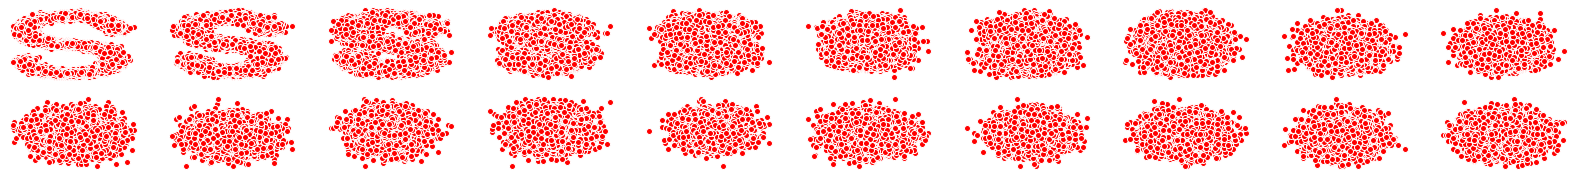

In [42]:
num_shows  = 20
fig, axs = plt.subplots(2, 10, figsize=(28,3))
plt.rc("text", color="blue")

for i in range(num_shows):
    j = i //10
    k = i % 10
    q_i = q_x(dataset, torch.tensor([i*num_steps//num_shows]))
    axs[j, k].scatter(q_i[:, 0], q_i[:, 1], color="red", edgecolor="white")
    axs[j, k].set_axis_off()